In [5]:
# ReLU関数の実装
# インポートセット
from keras.datasets import mnist
import numpy as npy
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
# データの読み出し
mnist_raw_data = npy.load('mnist_raw.npz')

x_train=mnist_raw_data['x_train']
y_train=mnist_raw_data['y_train']
x_test=mnist_raw_data['x_test']
y_test=mnist_raw_data['y_test']

In [6]:
#データ整形
from keras.utils import np_utils

# 28×28⇒784配列変換
x_train=x_train.reshape(60000,784)
# 0-255⇒0-1に変換
x_train=x_train.astype('float32')
x_train=x_train/255
# 1-of-K符号化法で表現
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)

x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

print(x_train[0,150:200])
print(y_train[0])

[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079 0.6509804  1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117648 0.36862746 0.6039216
 0.6666667  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235295 0.6745098  0.99215686 0.9490196  0.7647059  0.2509804
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# ニューラルネットワークモデルの定義
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
npy.random.seed

model=Sequential()
# ReLu関数の適用
model.add(Dense(16,input_dim=784,activation='relu'))
model.add(Dense(16,input_dim=784,activation='relu'))
model.add(Dense(16,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])


In [16]:
# 学習の実行
import time

start_time=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('TEST loss:', score[0])
print('TEST accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time()-start_time))


Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 1.7930 - accuracy: 0.4206 - val_loss: 1.1347 - val_accuracy: 0.7000
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7629 - accuracy: 0.7875 - val_loss: 0.5266 - val_accuracy: 0.8489
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8647 - val_loss: 0.4004 - val_accuracy: 0.8849
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8907 - val_loss: 0.3426 - val_accuracy: 0.8979
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.9064 - val_loss: 0.3006 - val_accuracy: 0.9128
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9176 - val_loss: 0.2709 - val_accuracy: 0.9233
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.9246 - val_loss: 0.2532 - val_accuracy: 0.9260
Epoch 8/10
60/60 [==

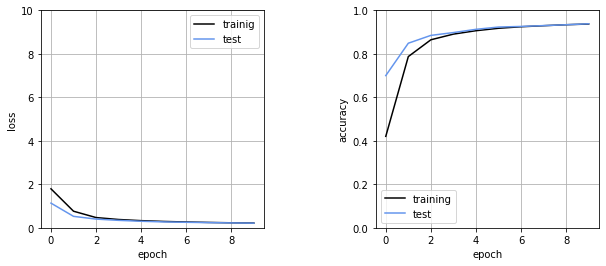

In [17]:
# 経過表示
plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

# 交差エントロピー誤差の経過表示
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='trainig',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# 正答率の経過表示
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


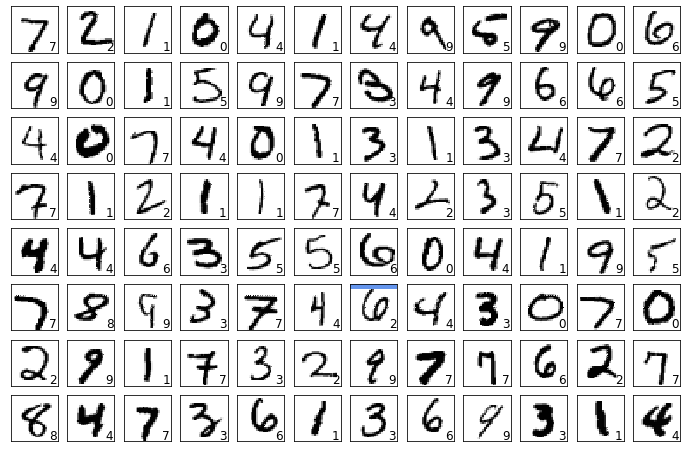

In [18]:
# テストデータの投入
def show_prediction():
    n_show = 96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=npy.argmax(wk)
        plt.text(22,25.5,"%d"% prediction,fontsize=12)
        if prediction != npy.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")

show_prediction()
plt.show()